### Outline

This Ipython notebook is focused on data exploration to get an idea to clean data: analyzing missing values and multicollinearity in dataset

   * Visualizing Datatype Of Variable
   * Missing Value Analysis
   * Basic Feature Engineering From Timestamp
   * Outlier Analysis
   * Univariate Analysis
   * Top Contributing Features Using XGB
   * Correlation Analysis
   * Multicollinearity Analysis
   * Bivariate Analysis (Price Doc vs Top Contributing features)
   * Simple Submission 



### Setup Imports and Variables

In [2]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
##import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from scipy import stats
color = sns.color_palette()
%matplotlib inline
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(12, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (12,12)

# Size of matplotlib histogram bins
bin_size = 10

### Explore the Data

Read the Data

In [3]:
df_train = pd.read_csv('./data/input/train.csv')
df_train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [40]:
df_test = pd.read_csv('./data/input/test.csv')
df_test.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


View the data types of each column:

In [6]:
df_train.shape

(30471, 292)

In [7]:
df_test.shape

(7662, 291)

In [8]:
dtype_df = df_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,157
1,float64,119
2,object,16


Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.

### Investigate missing value

In [9]:
# list missing variables
df_train.columns[df_train.isnull().sum().nonzero()].tolist()

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

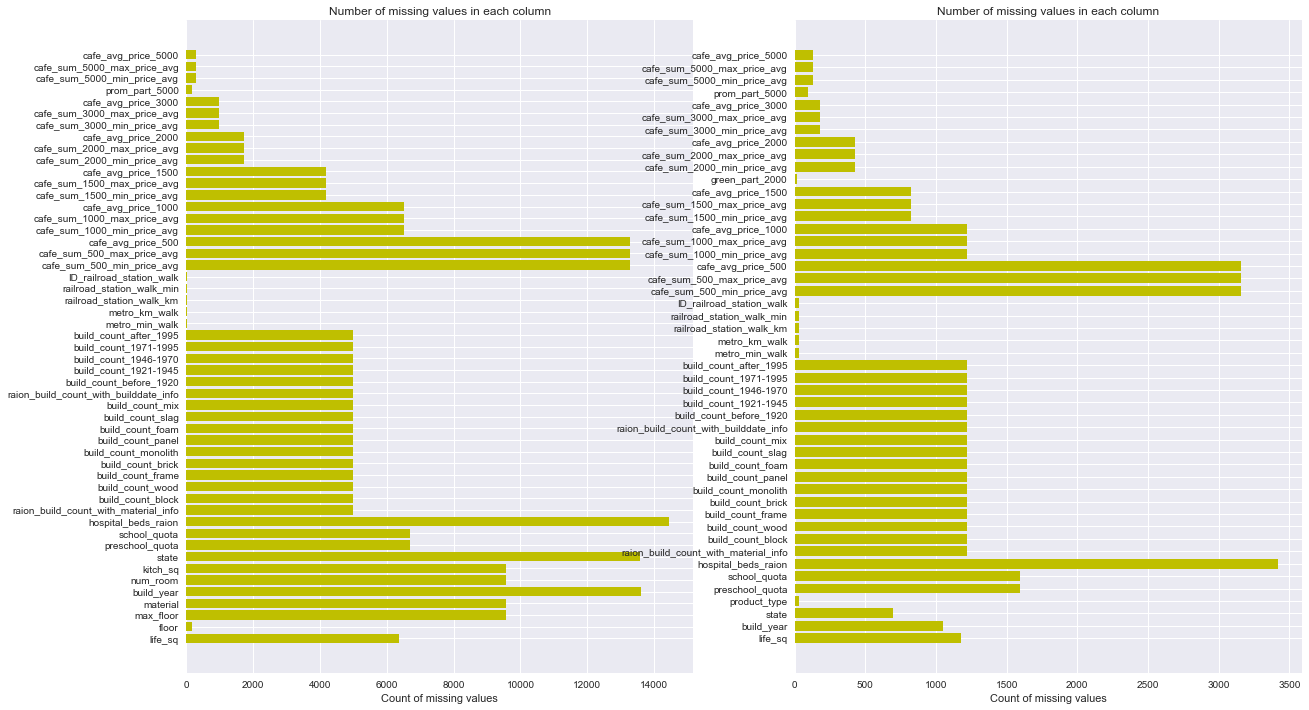

In [10]:
#train
missing_df = df_train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
#test
missing_df_t = df_test.isnull().sum(axis=0).reset_index()
missing_df_t.columns = ['column_name', 'missing_count']
missing_df_t = missing_df_t.ix[missing_df_t['missing_count']>0]

ind1 = np.arange(missing_df.shape[0])
ind2 = np.arange(missing_df_t.shape[0])

width = 0.9
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,12)
rects = ax1.barh(ind1, missing_df.missing_count.values, color='y')
ax1.set_yticks(ind1)
ax1.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Number of missing values in each column")

rect = ax2.barh(ind2, missing_df_t.missing_count.values, color='y')
ax2.set_yticks(ind2)
ax2.set_yticklabels(missing_df_t.column_name.values, rotation='horizontal')
ax2.set_xlabel("Count of missing values")
ax2.set_title("Number of missing values in each column")

plt.show()

In [11]:
#check missing values are not in both train and test
set(missing_df.column_name.values).symmetric_difference(missing_df_t.column_name.values)

{'floor',
 'green_part_2000',
 'kitch_sq',
 'material',
 'max_floor',
 'num_room',
 'product_type'}

In [12]:
#check missing values are common in both train and test
set(missing_df.column_name.values).intersection(missing_df_t.column_name.values)

{'ID_railroad_station_walk',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'build_count_before_1920',
 'build_count_block',
 'build_count_brick',
 'build_count_foam',
 'build_count_frame',
 'build_count_mix',
 'build_count_monolith',
 'build_count_panel',
 'build_count_slag',
 'build_count_wood',
 'build_year',
 'cafe_avg_price_1000',
 'cafe_avg_price_1500',
 'cafe_avg_price_2000',
 'cafe_avg_price_3000',
 'cafe_avg_price_500',
 'cafe_avg_price_5000',
 'cafe_sum_1000_max_price_avg',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_5000_max_price_avg',
 'cafe_sum_5000_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_sum_500_min_price_avg',
 'hospital_beds_raion',
 'life_sq',
 'metro_km_walk',
 'metro_min_walk',
 'preschool_quota',
 'prom_pa

In [13]:
high_missing_train= df_train.columns[df_train.isnull().sum()>0.35*len(df_train)].tolist()
high_missing_train

['build_year',
 'state',
 'hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500']

In [14]:
high_missing_test = df_test.columns[df_test.isnull().sum()>0.35*len(df_test)].tolist()
high_missing_test

['hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500']

Colums with missing, should remove the counts of missing values larger than 35% of total records.

Analyze the cafe_*500 variable's relationship with price_doc; Guess because of these houses with price average 500 in poor property. The price should be low. So fill all missing of cafe_price_500 to 0

 None]

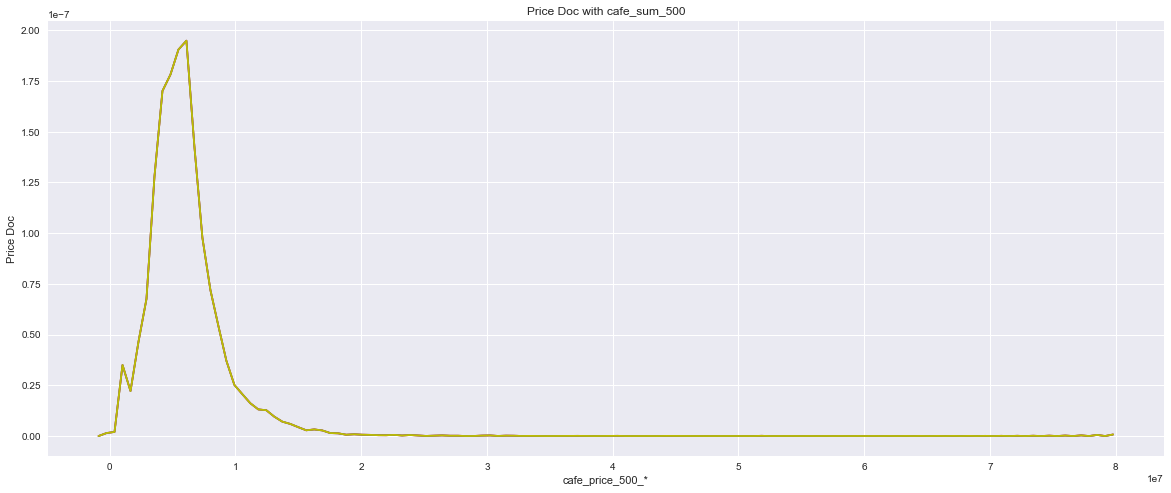

In [15]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
df_train_cafe_price_null =df_train[df_train["cafe_sum_500_min_price_avg"].isnull()]
df_train_cafe_price_null2 =df_train[df_train["cafe_sum_500_max_price_avg"].isnull()]
df_train_cafe_price_null3 =df_train[df_train["cafe_avg_price_500"].isnull()]

#sns.pointplot(x=df_train_cafe_price_null.index, y=df_train_cafe_price_null["price_doc"], data=df_train_cafe_price_null, join=True,ax=ax,color="#34495e")
sns.kdeplot(df_train_cafe_price_null.price_doc.values,ax=ax,color='r')
sns.kdeplot(df_train_cafe_price_null2.price_doc.values,ax=ax)
sns.kdeplot(df_train_cafe_price_null3.price_doc.values,ax=ax,color='y')
ax.set(xlabel='cafe_price_500_*', ylabel='Price Doc',title="Price Doc with cafe_sum_500",label='big')
#plt.xticks(rotation=90)
#plt.ylim([0,70000000])


Looks like no relationship between price and cafe_price_500.

Correlation between high missing values variables and few missing values variables to find if we can impute missing.

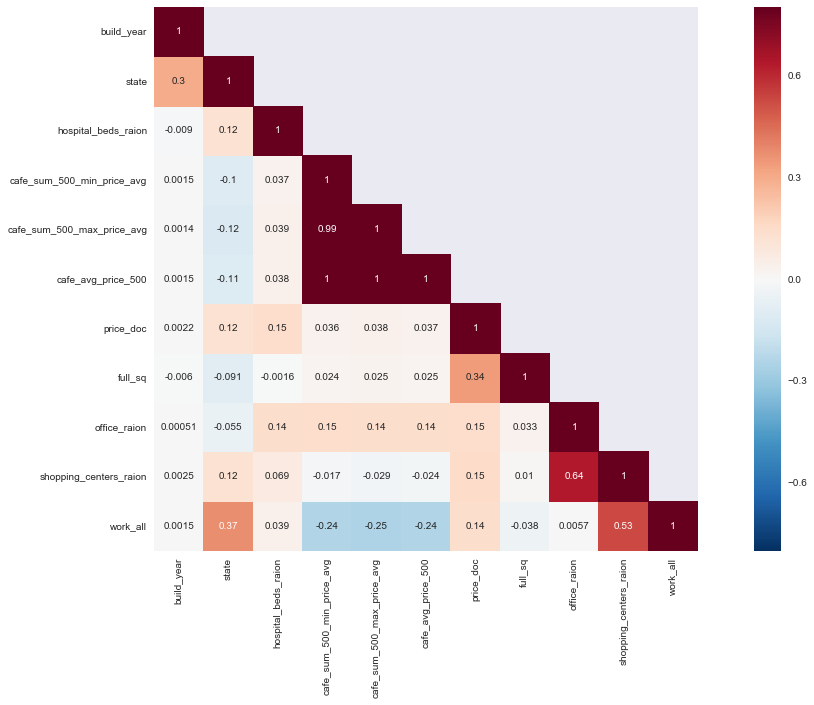

In [16]:
feature_nan=high_missing_train
feature_nan.extend(("price_doc","full_sq","office_raion","shopping_centers_raion","work_all"))
corrMatt = df_train[feature_nan].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)      

I may drop these cafe_500 first because both test and train has large missings. if have time can fill 0 or impute with vairables in macro.csv

In [17]:
##trainBuild = df_train.dropna()
df_train["yearbuilt"] = pd.to_numeric(df_train["build_year"].map(lambda x:str(x).split(".")[0]),errors='coerce')
df_train["year_transaction"] = pd.to_numeric(df_train["timestamp"].map(lambda x:str(x).split("-")[0]),errors='coerce')
df_train["yearbuilt_transaction"]=df_train["year_transaction"]- df_train["yearbuilt"]

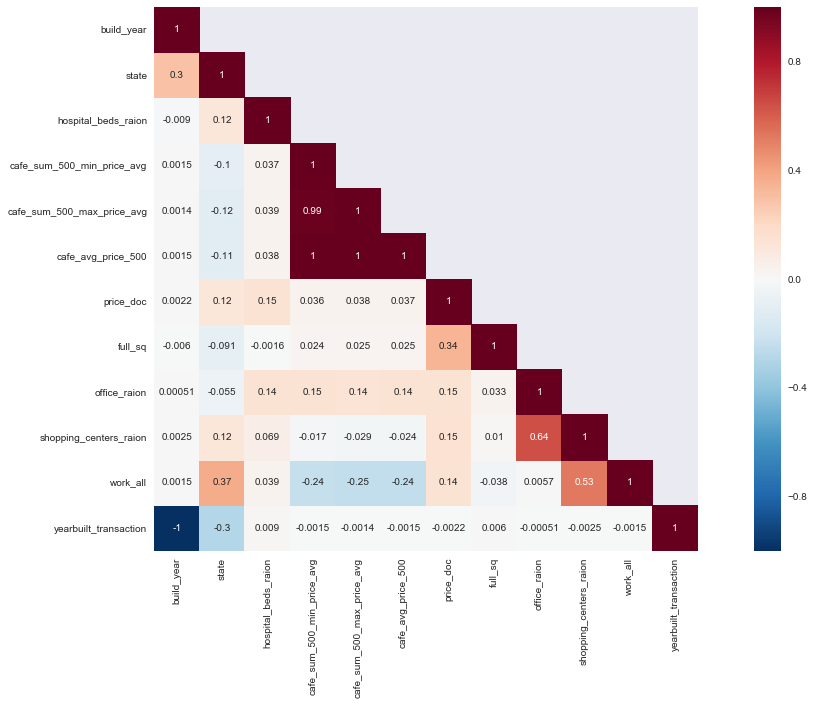

In [18]:
feature_nan.append("yearbuilt_transaction")
corrMatt = df_train[feature_nan].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)   

In [19]:
feature_nan

['build_year',
 'state',
 'hospital_beds_raion',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'price_doc',
 'full_sq',
 'office_raion',
 'shopping_centers_raion',
 'work_all',
 'yearbuilt_transaction']

### Categorical and numeric vars

In [20]:
char_feature = (df_train.dtypes[df_train.dtypes.map(lambda x : x =='object')]).index.tolist()
disc_feature = (df_train.dtypes[df_train.dtypes.map(lambda x : x =='int64')]).index.tolist()
cont_feature = (df_train.dtypes[df_train.dtypes.map(lambda x : x =='float64')]).index.tolist()

In [21]:
#categorical
len(char_feature)

16

In [22]:
#Discret
len(disc_feature)

158

In [23]:
#continous
len(cont_feature)

121

In [24]:
def char_f(df):
    char_feature = (df.dtypes[df.dtypes.map(lambda x : x =='object')]).index.tolist()
    return char_feature
def dis_f(df):
    dis_feature = (df.dtypes[df.dtypes.map(lambda x : x =='object')]).index.tolist()
    return dis_feature
def cont_f(df):
    cont_feature = (df.dtypes[df.dtypes.map(lambda x : x =='object')]).index.tolist()
    return cont_feature


### Basic vars and other neighbourhood vars

In [25]:
basic_feature = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
                 'num_room', 'kich_sq', 'state','product_type', 'sub_area']

### Discover target variable

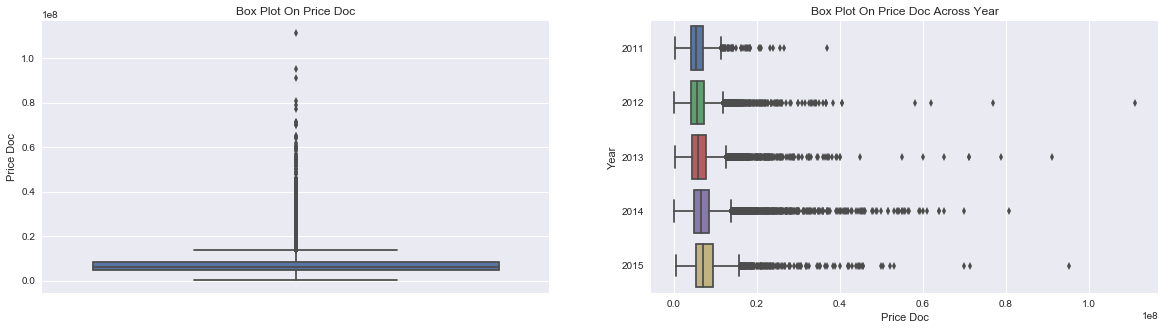

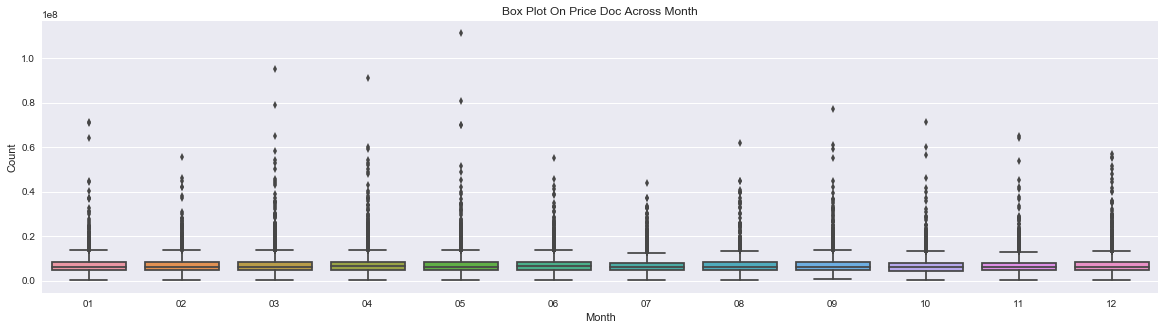

In [44]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,5)
df_train['yearmonth'] = df_train['timestamp'].apply(lambda x: x[:4]+x[5:7])
df_train['year'] = df_train['timestamp'].apply(lambda x: x[:4])
df_train['month'] = df_train['timestamp'].apply(lambda x: x[5:7])
df_test['yearmonth'] = df_test['timestamp'].apply(lambda x: x[:4]+x[5:7])
df_test['year'] = df_test['timestamp'].apply(lambda x: x[:4])
df_test['month'] = df_test['timestamp'].apply(lambda x: x[5:7])
sns.boxplot(data=df_train,y="price_doc",orient="v",ax=ax1)
sns.boxplot(data=df_train,x="price_doc",y="year",orient="h",ax=ax2)

fig1,ax3 = plt.subplots()
fig1.set_size_inches(20,5)
sns.boxplot(data=df_train,x="month",y="price_doc",orient="v",ax=ax3)
ax1.set(ylabel='Price Doc',title="Box Plot On Price Doc")
ax2.set(xlabel='Price Doc', ylabel='Year',title="Box Plot On Price Doc Across Year")
ax3.set(xlabel='Month', ylabel='Count',title="Box Plot On Price Doc Across Month")

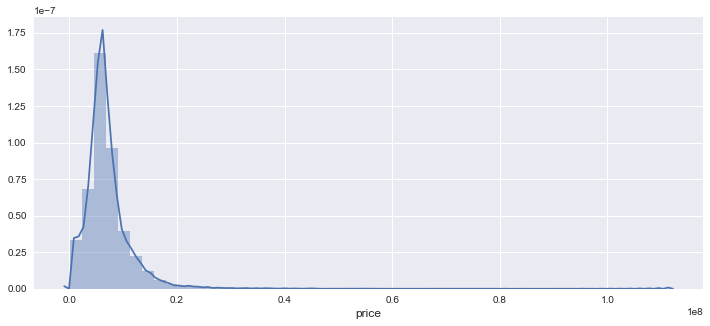

In [27]:
sns.distplot(df_train.price_doc.values, bins=50,kde=True)
plt.xlabel('price',fontsize = 12)
plt.show()

Right long tail. Use log to transform the data.

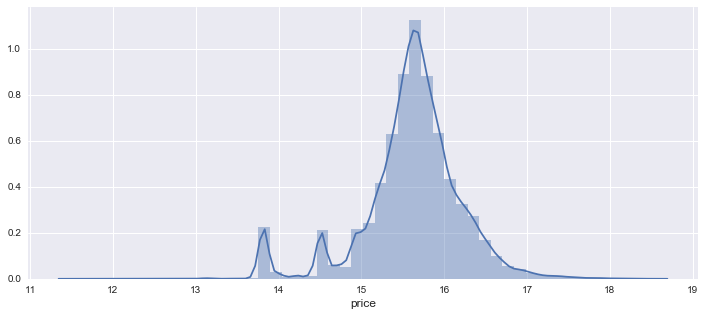

In [28]:
sns.distplot(np.log(df_train.price_doc.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

Price change with time_stamp; try median price and average price. 

In [29]:
grouped_df_median = df_train.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()
grouped_df_mean = df_train.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()

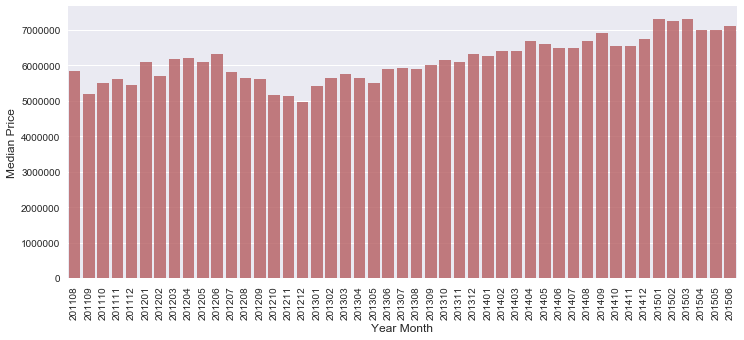

In [30]:
sns.barplot(grouped_df_median.yearmonth.values, grouped_df_median.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

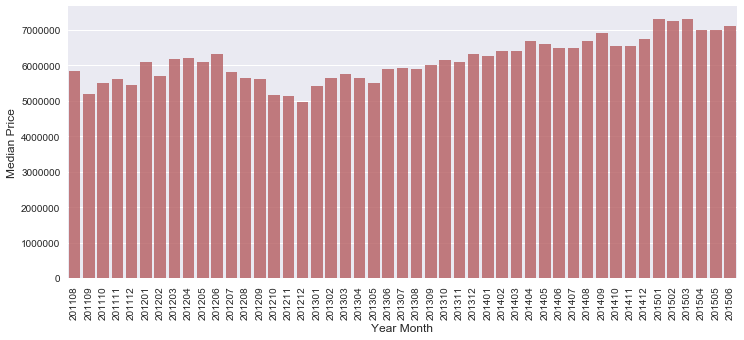

In [31]:
sns.barplot(grouped_df_mean.yearmonth.values, grouped_df_mean.price_doc.values, alpha=0.8, color=color[2])
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Some variations for median price with respect to time. The pattern looks like linear

((array([-4.07764062, -3.86644899, -3.75109077, ...,  3.75109077,
          3.86644899,  4.07764062]),
  array([ 11.51293546,  12.15478461,  12.20607765, ...,  18.32709614,
          18.37067606,  18.52604128])),
 (0.58651573976941318, 15.609483171522076, 0.97001952755917309))

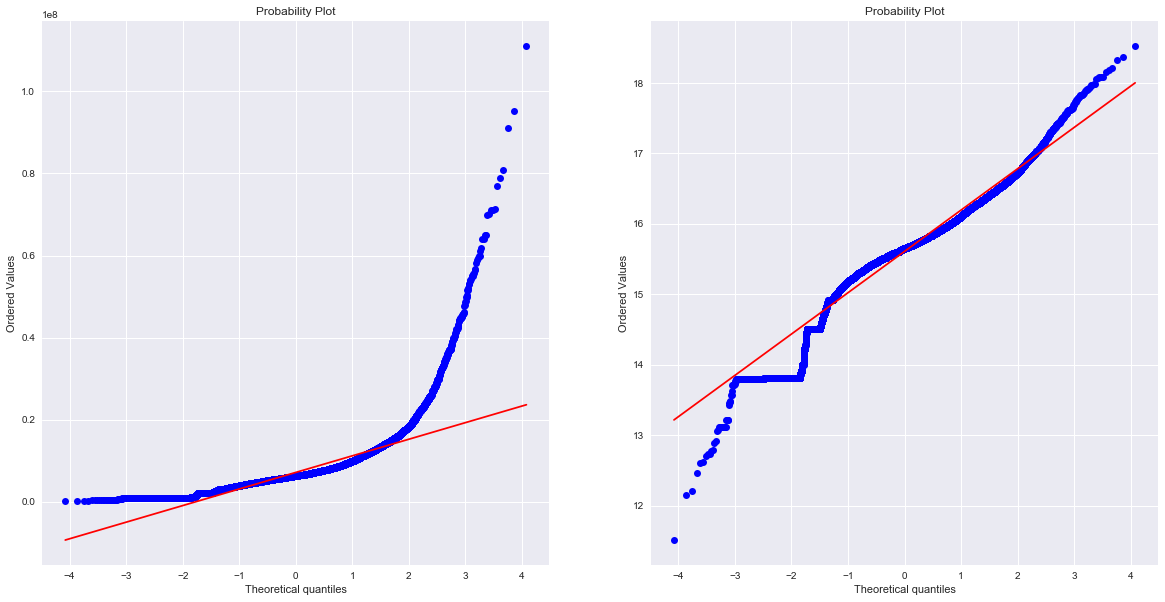

In [32]:
fig,axes = plt.subplots(ncols=2)
fig.set_size_inches(20, 10)
stats.probplot(df_train["price_doc"], dist='norm', fit=True, plot=axes[0])
stats.probplot(np.log1p(df_train["price_doc"]), dist='norm', fit=True, plot=axes[1])

### General Feature selection

In [33]:
# Load the packages for modeling
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV,  RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn import cross_validation, metrics   #Additional scklearn functions

C:\Users\qija\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\qija\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
def clean_data(df):
    # convert object column to numeric
    char_columns = (df.dtypes[df.dtypes.map(lambda x : x =='object')]).index
    float_columns = (df.dtypes[df.dtypes.map(lambda x : x =='float64')]).index
    le=LabelEncoder()
    for feature in char_columns:
        df[feature]=le.fit_transform(df[feature])
    
    df[float_columns]=df[float_columns].astype(np.float32)
    return df

In [8]:
y_train = np.log1p(df_train["price_doc"])
x_train_temp = df_train.drop(["id", "timestamp", "price_doc"], axis=1)
#x_train_te =x_train_temp.dropna(axis=1,how='any')
x_train = clean_data(x_train_temp)

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          #'learning_rate': 0.01, 'loss': 'ls'}
#clf = GradientBoostingRegressor(**params)
#clf.fit(x_train,y_train)
x_train.to_csv("./data/output/x_train_vif.csv",index=False)

In [9]:
macro = pd.read_csv('./data/input/macro.csv')
macro_temp = macro.drop([ "timestamp"], axis=1)
macro_vif = clean_data(macro_temp)
macro_vif.to_csv("./data/output/macro_vif.csv",index=False)

In [47]:
mse = mean_squared_error(y_train, clf.predict(x_train))
mse

0.20459093268181608

In [37]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_train, clf.predict(x_train))
print('MAE: %.4f' % mae)

MAE: 0.2740


In [53]:
x_test_rd =df_test[x_train.columns]
x_test = clean_data(x_test_rd)


C:\Users\qija\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
y_predict = clf.predict(x_test)
p_y =np.exp(y_predict)-1
id_test = df_test.id
output = pd.DataFrame({'id': id_test, 'price_doc': p_y})
output.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
output.to_csv('./data/output/grab_noimpute.csv', index=False)

In [38]:
cv_score = cross_validation.cross_val_score(clf, x_train, y_train)
print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(df_train['price_doc'].values,clf.predict(x_train))

IndentationError: unexpected indent (<ipython-input-38-42ec2fbd0bcb>, line 3)

In [ ]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['price_doc'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['price_doc'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['price_doc'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['price_doc'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [ ]:
features = pd.DataFrame()
features['features'] = x_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=60)
sns.barplot(data=features.head(30),x="features",y="importance",ax=ax,orient="v")

### Correlation Analysis

In [ ]:
topFeatures = features["features"].tolist()[:15]
topFeatures.append("price_doc")
corrMatt = df_train[topFeatures].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)      

### Multicollinearity

### Bivariate Analysis

Relationship between Basic variables and  Price Doc

* full_sq
* life_sq
* floor
* max_floor
* build_year
* num_room

In [ ]:
for col in ["price_doc","full_sq","life_sq"]:
    ulimit = np.percentile(df_train[col].values, 99.9)
    llimit = np.percentile(df_train[col].values, 0.01)
    df_train[col].ix[df_train[col]>ulimit] = ulimit
    df_train[col].ix[df_train[col]<llimit] = llimit

### Full Square vs Price Doc

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(df_train.full_sq.values), y=np.log1p(df_train.price_doc.values), size=10,kind="hex")
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of Total area in square metre', fontsize=12)
plt.show()

### Life Square vs Price Doc

In [ ]:
plt.figure(figsize=(12,12))
sns.jointplot(x=np.log1p(df_train.life_sq.values), y=np.log1p(df_train.price_doc.values), 
              kind='kde', size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Log of living area in square metre', fontsize=12)
plt.show()

### (Max) Floor vs Price Doc

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x="floor", y="price_doc", data=df_train,ax=ax)
ax.set(ylabel='Price Doc',xlabel="Floor",title="Floor Vs Price Doc")

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(y="price_doc", x="max_floor", data=df_train,ax=ax)
ax.set(ylabel='Price Doc',xlabel="Max Floor",title="Max Floor Vs Price Doc")
plt.xticks(rotation=90) 

### Build Year vs Price Doc

In [ ]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
trainBuild = df_train
trainBuild["yearbuilt"] = trainBuild["build_year"].map(lambda x:str(x).split(".")[0])
trainBuildGrouped = trainBuild.groupby(["yearbuilt"])["price_doc"].mean().to_frame().reset_index()
sns.pointplot(x=trainBuildGrouped["yearbuilt"], y=trainBuildGrouped["price_doc"], data=trainBuildGrouped, join=True,ax=ax,color="#34495e")
ax.set(xlabel='Build Year', ylabel='Price Doc',title="Average Price Doc Across Year",label='big')
plt.xticks(rotation=90)
plt.ylim([0,70000000])